In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import uncertainties
from uncertainties import ufloat
from uncertainties import unumpy
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
%matplotlib inline 

In [2]:
df = pd.read_csv('dados.csv')
df2 = pd.read_csv('dados.csv')

In [3]:
df.head()

,V(V),I(mA),FundoEscala(Tensão (V)),FundoEscala(Corrente(mA))
0,11.1,93,50.0,100
1,10.5,90,50.0,100
2,8.4,78,10.0,100
3,6.4,68,10.0,100
4,5.6,62,10.0,100


In [4]:
# Calculando a incerteza baseada no fundo de escala
df['dV(V)'] = np.round(df['FundoEscala(Tensão (V))'] * 0.03, 1)
df['dI(mA)'] = np.round(df['FundoEscala(Corrente(mA))'] * 0.02, 1)

In [5]:
df.head()

,V(V),I(mA),FundoEscala(Tensão (V)),FundoEscala(Corrente(mA)),dV(V),dI(mA)
0,11.1,93,50.0,100,1.5,2.0
1,10.5,90,50.0,100,1.5,2.0
2,8.4,78,10.0,100,0.3,2.0
3,6.4,68,10.0,100,0.3,2.0
4,5.6,62,10.0,100,0.3,2.0


<ErrorbarContainer object of 3 artists>

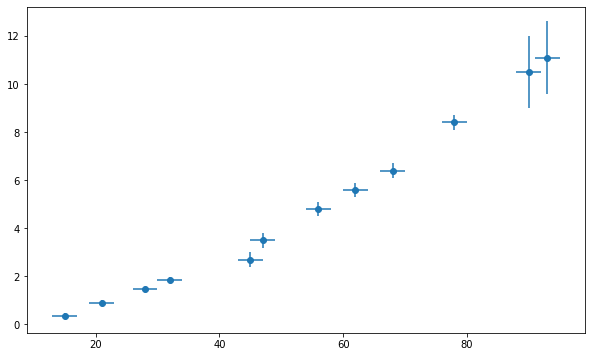

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.errorbar(df['I(mA) '], df['V(V)'], yerr=df['dV(V)'], xerr=df['dI(mA)'],fmt='o')

- Observe que os pontos na figura não é uma reta, se parece com uma curva exponencial.

In [7]:
# Definindo a função da reta
def reta(x,alpha,b):
    return alpha * x + b
# Definindo a função exponencial

def exp(x,alpha,a,b):
    return b + a * 0.0005 * np.exp(0.0005 * alpha * x)

# Definindo a função exponencial

def exp_unc(x,alpha,a,b):
    return b + a * 0.0005 * unumpy.exp(0.0005 * alpha * x)

In [8]:
# Curva principal
alpha1, pcov = curve_fit(exp, df['I(mA) '], df['V(V)'])
V_fit = exp(df['I(mA) '], *alpha1)
teste = exp(df['I(mA) '], 0.1,0.0005,0.000005)


/home/filipe/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


/home/filipe/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


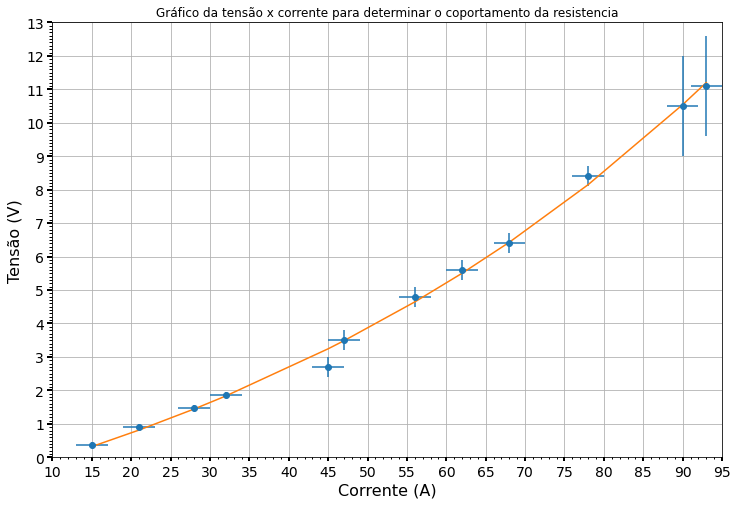

In [9]:
#fig, ax2 = plt.subplots(figsize=(10, 6))
plt.figure(figsize=(12,8))
plt.errorbar(df['I(mA) '], df['V(V)'], yerr=df['dV(V)'], xerr=df['dI(mA)'], fmt='o')
plt.plot(df['I(mA) '], V_fit)
plt.xlabel('Corrente (A)',fontsize=16)
plt.ylabel('Tensão (V)', fontsize=16)

# Título:
plt.title('Gráfico da tensão x corrente para determinar o coportamento da resistencia')

# Escala
ax = plt.axes()

# Eixo X
plt.xticks(fontsize=14)
plt.xlim([10,95])
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.tick_params(axis='x', which='minor', length=2,width='1')
plt.tick_params(axis='x', which='major', length=4,width='2')


# Eixo y
plt.yticks(fontsize=14)
plt.ylim([0,13])
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
plt.tick_params(axis='y', which='minor', length=3,width='1')
plt.tick_params(axis='y', which='major', length=5,width='2')

plt.savefig('VxI', dpi='figure')

plt.grid()
plt.show()

In [10]:
I = unumpy.uarray(df['I(mA) '], df['dI(mA)'])
wrapped_exp = uncertainties.wrap(exp)
V_unc = np.array([])
for i in range(len(df['I(mA) '])):
    V_fit_unc = wrapped_exp(ufloat(df['I(mA) '][i], df['dI(mA)'][i]),*alpha1)
    V_unc = np.append(V_unc, V_fit_unc)

# V = unumpy.uarray(V_fit, )
R = V_unc/unumpy.uarray(df['I(mA) '], df['dI(mA)']) 
# print(V_unc)
R = R * 1000

In [11]:
print(V_unc)

[11.202107285785399+/-0.4491293712328839
 10.541729306742933+/-0.4314923604329427
 8.149558232384319+/-0.36760357404366517
 6.428977224937571+/-0.3216512466178221
 5.501668576514693+/-0.296885198162448
 4.645759525923514+/-0.2740260532924107
 3.483861012179875+/-0.24299471175416987
 3.2440824897278224+/-0.23659083843231202
 1.8323251174927613+/-0.19888640195131302
 1.4449891569143665+/-0.1885416486433574
 0.8149966613974104+/-0.17171615645999
 0.3199453365242171+/-0.15849459966023763]


In [12]:
R_arr = np.array(np.round(unumpy.nominal_values(R),1))
dR_arr = np.flip(np.array(np.round(unumpy.std_devs(R),0)))

df['R(Ohm)'] = R_arr
df['dR(Ohm)'] = dR_arr 

In [13]:
print(dR_arr)

[11.  9.  8.  7.  6.  6.  6.  6.  5.  5.  5.  5.]


In [14]:
df.head(10)

,V(V),I(mA),FundoEscala(Tensão (V)),FundoEscala(Corrente(mA)),dV(V),dI(mA),R(Ohm),dR(Ohm)
0,11.10,93,50.0,100,1.5,2.0,120.5,11.0
1,10.50,90,50.0,100,1.5,2.0,117.1,9.0
2,8.40,78,10.0,100,0.3,2.0,104.5,8.0
3,6.40,68,10.0,100,0.3,2.0,94.5,7.0
4,5.60,62,10.0,100,0.3,2.0,88.7,6.0
5,4.80,56,10.0,100,0.3,2.0,83.0,6.0
6,3.50,47,10.0,100,0.3,2.0,74.1,6.0
7,2.70,45,10.0,100,0.3,2.0,72.1,6.0
8,1.86,32,2.5,100,0.1,2.0,57.3,5.0
9,1.47,28,2.5,100,0.1,2.0,51.6,5.0


/home/filipe/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


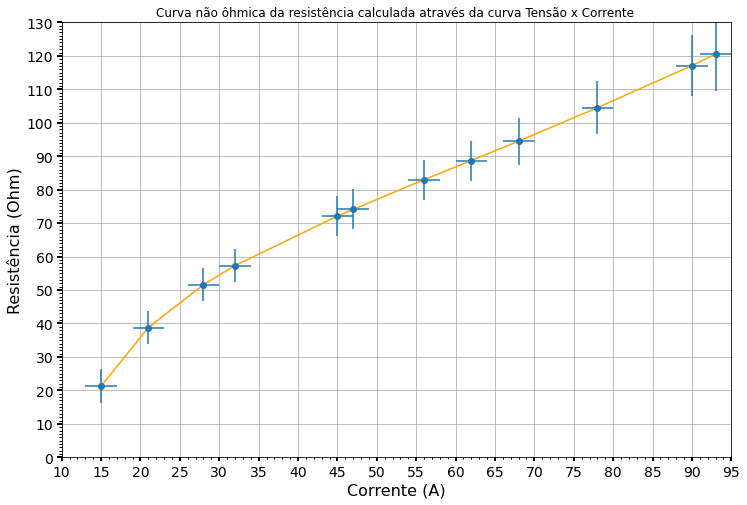

In [15]:
plt.figure(figsize=(12,8))
plt.plot(df['I(mA) '],df['R(Ohm)'], color='orange')
plt.errorbar(df['I(mA) '], df['R(Ohm)'], yerr=df['dR(Ohm)'], xerr=df['dI(mA)'], fmt='o')
# plt.scatter(df['I(mA) '], df['R(Ohm)'])

# Titulo 
plt.title('Curva não ôhmica da resistência calculada através da curva Tensão x Corrente ')


# Escala
ax = plt.axes()

# Eixo X
plt.xticks(fontsize=14)
plt.xlim([10,95])
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.tick_params(axis='x', which='minor', length=2,width='1')
plt.tick_params(axis='x', which='major', length=4,width='2')


# Eixo y
plt.yticks(fontsize=14)
plt.ylim([0,130])
ax.yaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.tick_params(axis='y', which='minor', length=3,width='1')
plt.tick_params(axis='y', which='major', length=5,width='2')


plt.xlabel('Corrente (A)',fontsize=16)
plt.ylabel('Resistência (Ohm)', fontsize=16)

plt.savefig('RxI', dpi='figure')

plt.grid()

In [16]:
df2 = df.drop(columns=['dR(Ohm)'])

In [17]:
df2.head(10)

,V(V),I(mA),FundoEscala(Tensão (V)),FundoEscala(Corrente(mA)),dV(V),dI(mA),R(Ohm)
0,11.10,93,50.0,100,1.5,2.0,120.5
1,10.50,90,50.0,100,1.5,2.0,117.1
2,8.40,78,10.0,100,0.3,2.0,104.5
3,6.40,68,10.0,100,0.3,2.0,94.5
4,5.60,62,10.0,100,0.3,2.0,88.7
5,4.80,56,10.0,100,0.3,2.0,83.0
6,3.50,47,10.0,100,0.3,2.0,74.1
7,2.70,45,10.0,100,0.3,2.0,72.1
8,1.86,32,2.5,100,0.1,2.0,57.3
9,1.47,28,2.5,100,0.1,2.0,51.6


In [22]:
df.head(20)

,V(V),I(mA),FundoEscala(Tensão (V)),FundoEscala(Corrente(mA)),dV(V),dI(mA),R(Ohm),dR(Ohm)
0,11.10,93,50.0,100,1.5,2.0,120.5,11.0
1,10.50,90,50.0,100,1.5,2.0,117.1,9.0
2,8.40,78,10.0,100,0.3,2.0,104.5,8.0
3,6.40,68,10.0,100,0.3,2.0,94.5,7.0
4,5.60,62,10.0,100,0.3,2.0,88.7,6.0
5,4.80,56,10.0,100,0.3,2.0,83.0,6.0
6,3.50,47,10.0,100,0.3,2.0,74.1,6.0
7,2.70,45,10.0,100,0.3,2.0,72.1,6.0
8,1.86,32,2.5,100,0.1,2.0,57.3,5.0
9,1.47,28,2.5,100,0.1,2.0,51.6,5.0


In [19]:
# Calculo da incerteza 
erro = 0
for i in range(len(df['V(V)'])):
    erro_i = 0
    erro_i = (df['V(V)'][i] - V_fit[i])/df['dV(V)'][i]
    erro = erro_i + erro


erro = np.sqrt(erro)

In [20]:
print(erro)

1.304552034020713


In [21]:
df.to_csv('dadosfinal.csv')